# Analyse SQL des ventes – Superstore

Ce notebook présente une analyse des ventes du dataset Superstore
en utilisant des requêtes SQL exécutées via SQLite dans un environnement Python (Pandas).

Objectifs :
- Analyser les ventes et le profit
- Identifier les catégories et sous-catégories les plus rentables
- Étudier les tendances mensuelles
- Extraire des indicateurs business (KPI)


In [3]:
import pandas as pd

file_name = "superstore.csv"   # nom exact du fichier uploadé
df = pd.read_csv(file_name, encoding="latin-1", sep=';', decimal=',')  # Spécifier le séparateur et le séparateur décimal

df.head()

,ï»¿Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2020-152156,08/11/2020,11/11/2020,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2020-152156,08/11/2020,11/11/2020,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2020-138688,12/06/2020,16/06/2020,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2019-108966,11/10/2019,18/10/2019,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2019-108966,11/10/2019,18/10/2019,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
import sqlite3

# Créer une base SQLite en mémoire
conn = sqlite3.connect(":memory:")

# Envoyer le dataframe dans une table SQL
df.to_sql("orders", conn, index=False, if_exists="replace")


9994

In [5]:
import pandas as pd

query = """
SELECT COUNT(*) AS nb_lignes
FROM orders;
"""

pd.read_sql(query, conn)


,nb_lignes
0,9994


In [6]:
query = """
SELECT
  Category,
  ROUND(SUM(Sales), 2) AS total_sales,
  ROUND(SUM(Profit), 2) AS total_profit,
  ROUND(SUM(Profit) / NULLIF(SUM(Sales),0), 4) AS profit_margin
FROM orders
GROUP BY Category
ORDER BY total_sales DESC;
"""

pd.read_sql(query, conn)


,Category,total_sales,total_profit,profit_margin
0,Technology,836154.03,145454.95,0.1740
1,Furniture,741999.80,18451.27,0.0249
2,Office Supplies,719047.03,122490.80,0.1704


In [7]:
query = """
SELECT
  "Sub-Category" AS sub_category,
  ROUND(SUM(Profit), 2) AS total_profit
FROM orders
GROUP BY "Sub-Category"
ORDER BY total_profit DESC
LIMIT 10;
"""

pd.read_sql(query, conn)


,sub_category,total_profit
0,Copiers,55617.82
1,Phones,44515.73
2,Accessories,41936.64
3,Paper,34053.57
4,Binders,30221.76
5,Chairs,26590.17
6,Storage,21278.83
7,Appliances,18138.01
8,Furnishings,13059.14
9,Envelopes,6964.18


In [8]:
query = """
SELECT
  substr("Order Date", 7, 4) || '-' || substr("Order Date", 4, 2) AS year_month,
  ROUND(SUM(Sales), 2) AS total_sales
FROM orders
GROUP BY year_month
ORDER BY year_month;
"""

pd.read_sql(query, conn)


,year_month,total_sales
0,2018-01,14236.90
1,2018-02,4519.89
2,2018-03,55691.01
3,2018-04,28295.35
4,2018-05,23648.29
5,2018-06,34595.13
6,2018-07,33946.39
7,2018-08,27909.47
8,2018-09,81777.35
9,2018-10,31453.39


In [9]:
query = """
SELECT
  "Customer Name" AS customer_name,
  ROUND(SUM(Sales), 2) AS total_sales
FROM orders
GROUP BY "Customer Name"
ORDER BY total_sales DESC
LIMIT 10;
"""

pd.read_sql(query, conn)


,customer_name,total_sales
0,Sean Miller,25043.05
1,Tamara Chand,19052.22
2,Raymond Buch,15117.34
3,Tom Ashbrook,14595.62
4,Adrian Barton,14473.57
5,Ken Lonsdale,14175.23
6,Sanjit Chand,14142.33
7,Hunter Lopez,12873.30
8,Sanjit Engle,12209.44
9,Christopher Conant,12129.07


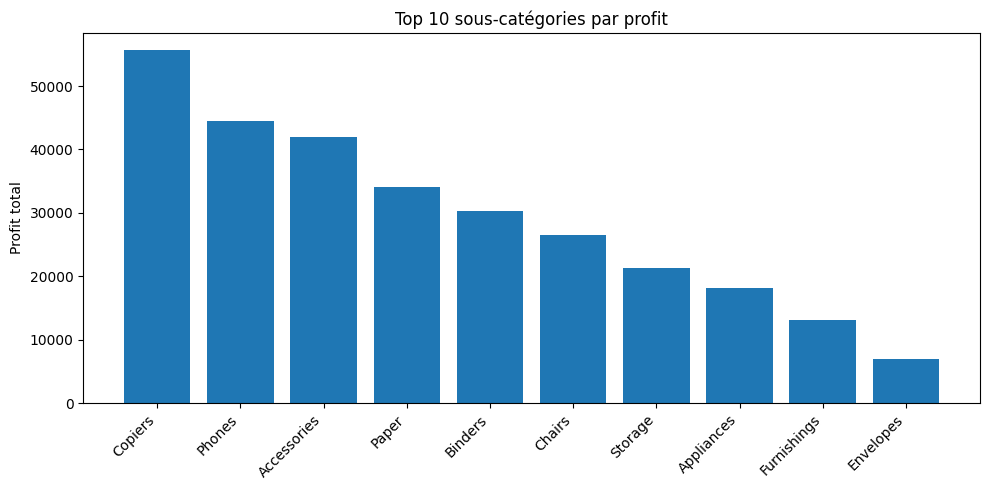

In [11]:
import matplotlib.pyplot as plt

# La requête correcte pour obtenir le Top 10 sous-catégories par profit
query_sub_category_profit = """
SELECT
  "Sub-Category" AS sub_category,
  ROUND(SUM(Profit), 2) AS total_profit
FROM orders
GROUP BY "Sub-Category"
ORDER BY total_profit DESC
LIMIT 10;
"""

df_top10 = pd.read_sql(query_sub_category_profit, conn)

plt.figure(figsize=(10,5))
plt.bar(df_top10["sub_category"], df_top10["total_profit"])
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 sous-catégories par profit")
plt.ylabel("Profit total")
plt.tight_layout()
plt.savefig("top10_profit.png", dpi=200)
plt.show()

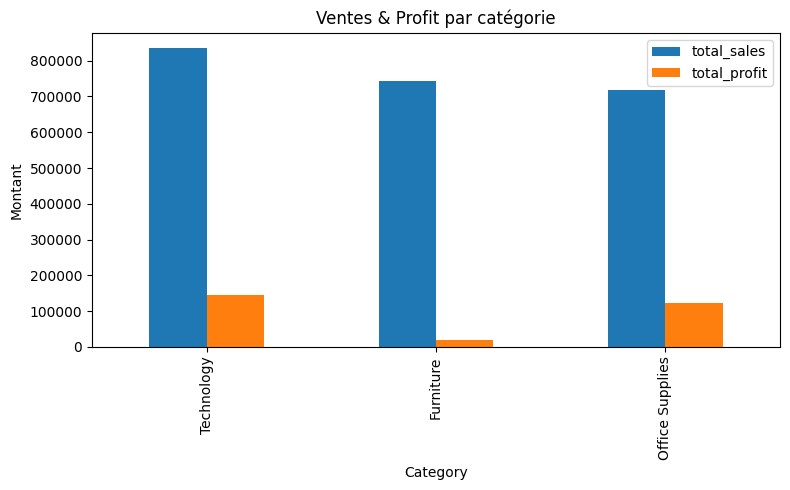

In [12]:
query_cat = """
SELECT
  Category,
  ROUND(SUM(Sales), 2) AS total_sales,
  ROUND(SUM(Profit), 2) AS total_profit
FROM orders
GROUP BY Category
ORDER BY total_sales DESC;
"""
df_cat = pd.read_sql(query_cat, conn)

df_cat.plot(x="Category", y=["total_sales","total_profit"], kind="bar", figsize=(8,5))
plt.title("Ventes & Profit par catégorie")
plt.ylabel("Montant")
plt.tight_layout()
plt.savefig("sales_profit_by_category.png", dpi=200)
plt.show()


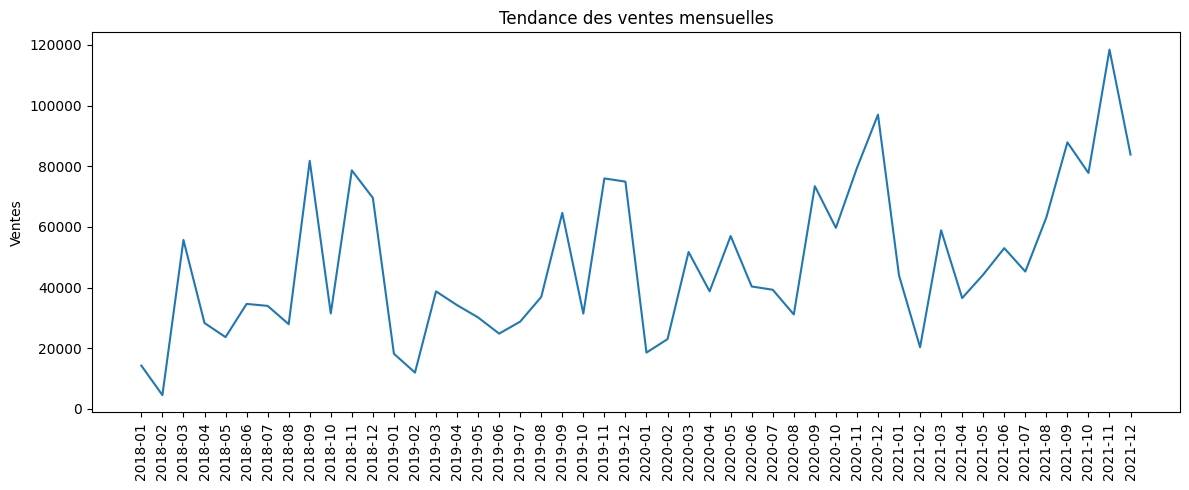

In [13]:
query_month = """
SELECT
  substr("Order Date", 7, 4) || '-' || substr("Order Date", 4, 2) AS year_month,
  ROUND(SUM(Sales), 2) AS total_sales
FROM orders
GROUP BY year_month
ORDER BY year_month;
"""
df_month = pd.read_sql(query_month, conn)

plt.figure(figsize=(12,5))
plt.plot(df_month["year_month"], df_month["total_sales"])
plt.xticks(rotation=90)
plt.title("Tendance des ventes mensuelles")
plt.ylabel("Ventes")
plt.tight_layout()
plt.savefig("monthly_sales_trend_sql.png", dpi=200)
plt.show()
